# Import Library

In [ ]:
import pandas as pd
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import librosa
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import Dataset

Sumber Dataset: https://data.mendeley.com/datasets/fr7zvy8j5s/1 <br>
Dataset Yang Kami Gunakan: https://drive.google.com/file/d/1WPKUsWK3fJIM6e25pZUzXrh_HvmBmnoO/view <br>
Load Model Untuk Sistem Deteksi: https://drive.google.com/file/d/1mmliRIdIBZmhcj88KZraGiOhWHFBH3TW/view?usp=drive_link 

In [362]:
categories = ["Normal", "Abnormal"]
dataset_path = "data"

In [363]:
category_paths = {category: os.path.join(dataset_path, category) for category in categories}

# Exploratory Data Analysis (EDA)

## Distribusi Data

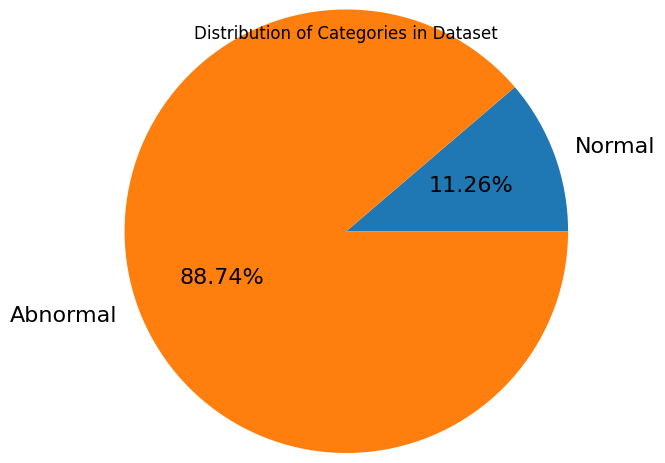

In [514]:
file_counts = [len(os.listdir(path)) for path in category_paths.values()]
plt.pie(file_counts, labels=categories, autopct='%.2f%%', radius=1.5, textprops={'fontsize': 16})
plt.title("Distribution of Categories in Dataset")
plt.show()

## Visualizing random sample

In [365]:
def visualize_random_sample(folder_name):
    random_sample = np.random.randint(0, len(os.listdir(folder_name)))
    sample_file = os.listdir(folder_name)[random_sample]
    sample_path = os.path.join(folder_name, sample_file)
    
    sample_audio, sample_rate = librosa.load(sample_path, sr=None)
    
    ipd.display(ipd.Audio(sample_audio, rate=sample_rate))
    
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(sample_audio, sr=sample_rate)
    plt.title(f"Waveform of {sample_file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
    fft = np.fft.fft(sample_audio)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    half_frequency = frequency[:len(magnitude)//2]
    half_magnitude = magnitude[:len(magnitude)//2]
    
    plt.figure(figsize=(12, 4))
    plt.plot(half_frequency, half_magnitude)
    plt.title(f"Spectrum of {sample_file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()
    
    spectrogram = librosa.stft(sample_audio)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))
    
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis="time", y_axis="hz")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {sample_file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()
    
    mfccs = librosa.feature.mfcc(y=sample_audio, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis="time")
    plt.colorbar()
    plt.title(f"MFCCs of {sample_file}")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.show()

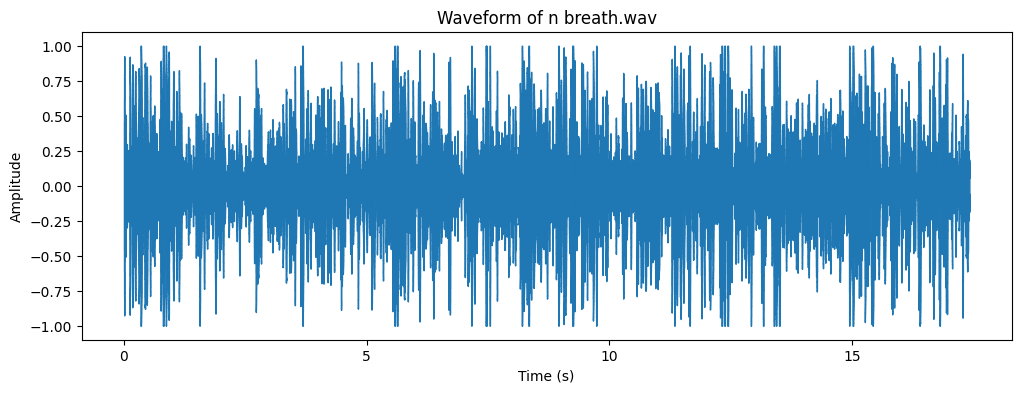

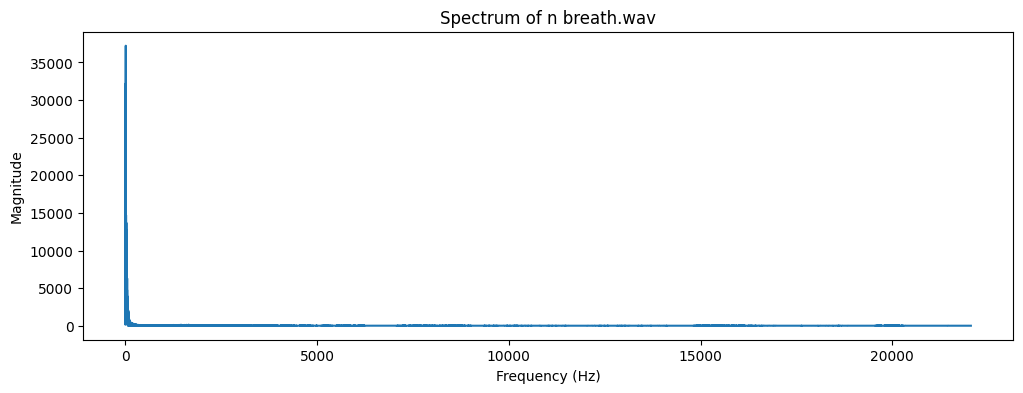

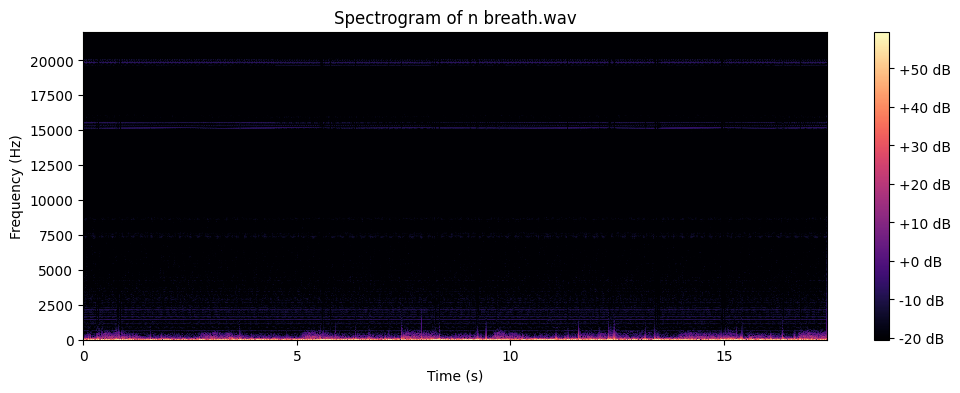

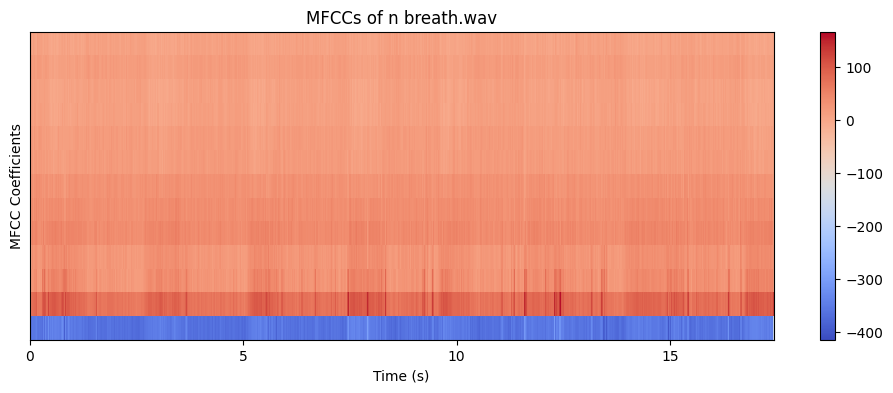

In [366]:
visualize_random_sample(category_paths["Normal"])

## *1. Normal Breathing sound*

In [367]:
selected_category = "Normal" 
category_path = os.path.join(dataset_path, selected_category)

if not os.path.exists(category_path):
    raise FileNotFoundError(f"Folder '{selected_category}' tidak ditemukan di '{dataset_path}'.")

file_name = next((file for file in os.listdir(category_path) if file.endswith('.wav')), None)

file_path = os.path.join(category_path, file_name)

audio_sample, sample_rate = librosa.load(file_path)
print(f"Memvisualisasikan: {file_name}")

Memvisualisasikan: breath n 3.wav


In [368]:
ipd.display(ipd.Audio(audio_sample, rate=sample_rate))

### Waveform

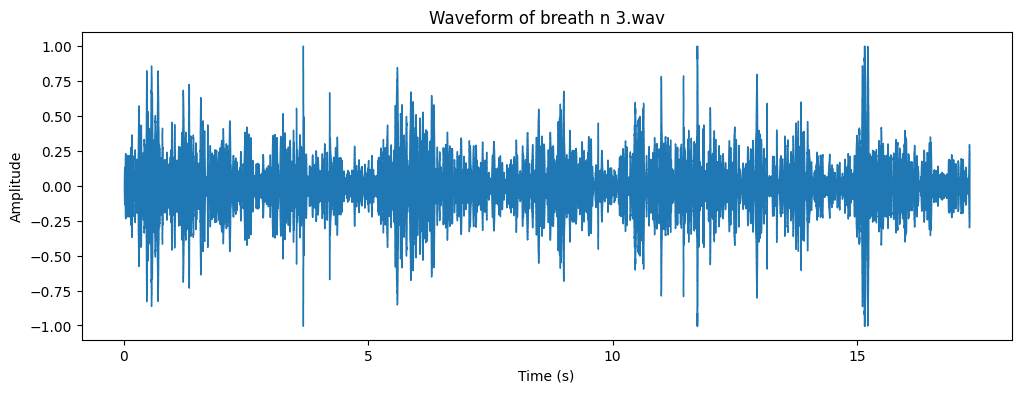

In [369]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_sample, sr=sample_rate)
plt.title(f"Waveform of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

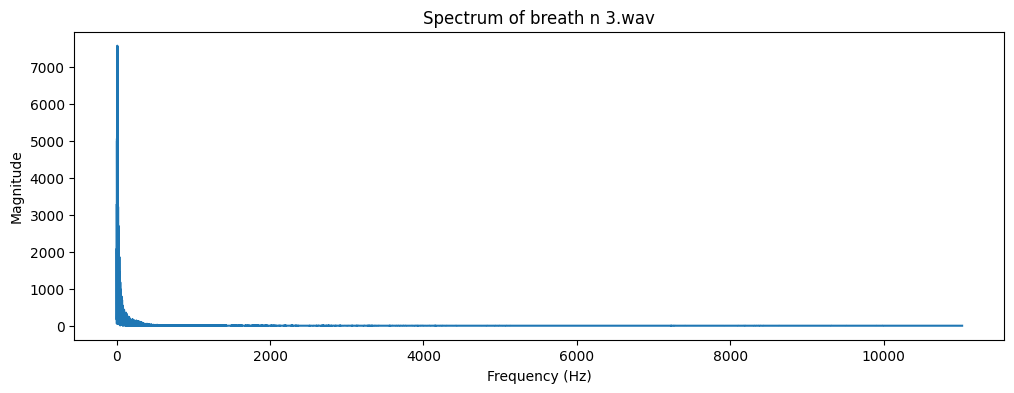

In [370]:
fft = np.fft.fft(audio_sample)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))
half_frequency = frequency[:len(magnitude)//2]
half_magnitude = magnitude[:len(magnitude)//2]
plt.figure(figsize=(12, 4))
plt.plot(half_frequency, half_magnitude)
plt.title(f"Spectrum of {file_name}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

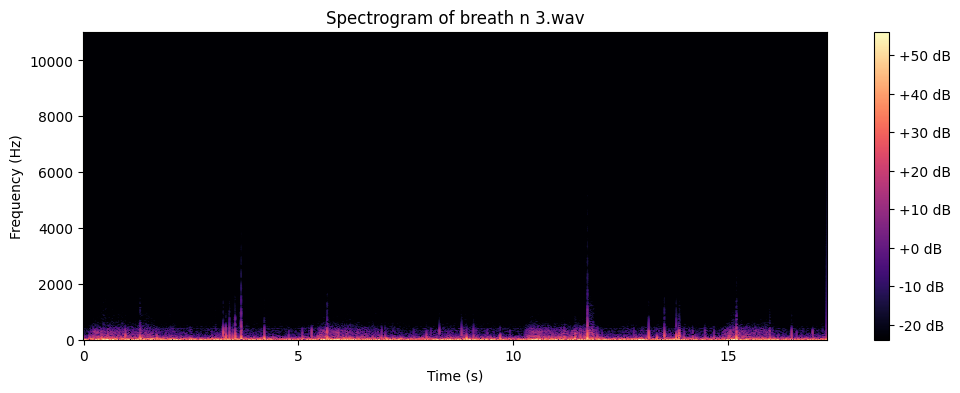

In [371]:
spectrogram = librosa.stft(audio_sample)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### MFCCs

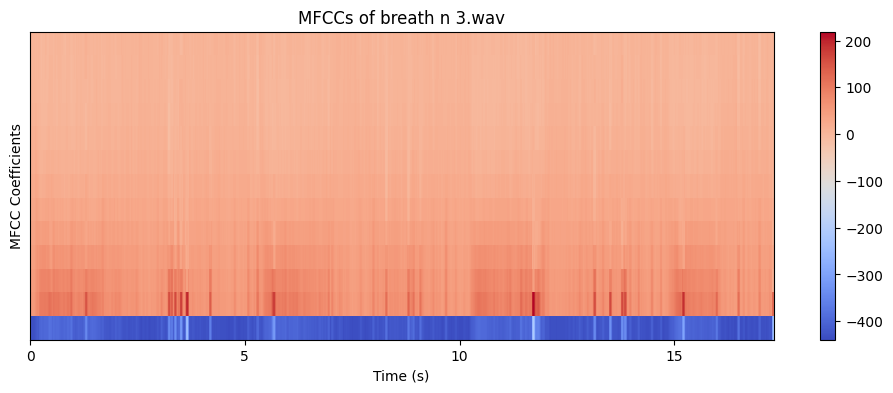

In [372]:
mfccs = librosa.feature.mfcc(y=audio_sample, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis="time")
plt.colorbar()
plt.title(f"MFCCs of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

## *2. Abnormal Breathing sound*

In [373]:
selected_category = "Abnormal"
category_path = os.path.join(dataset_path, selected_category)

if not os.path.exists(category_path):
    raise FileNotFoundError(f"Folder '{selected_category}' tidak ditemukan di '{dataset_path}'.")

file_name = next((file for file in os.listdir(category_path) if file.endswith('.wav')), None)

file_path = os.path.join(category_path, file_name)

audio_sample, sample_rate = librosa.load(file_path)
print(f"Memvisualisasikan: {file_name}")

Memvisualisasikan: 1.wav


In [374]:
ipd.display(ipd.Audio(audio_sample, rate=sample_rate))

### Waveform

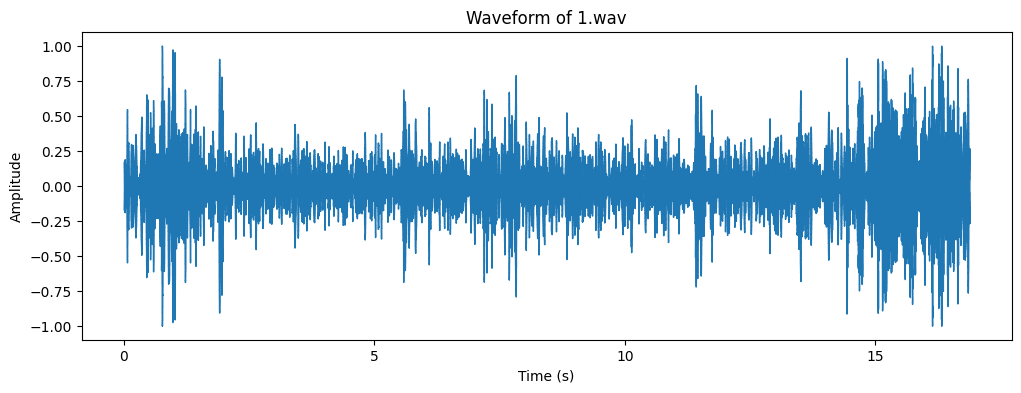

In [375]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_sample, sr=sample_rate)
plt.title(f"Waveform of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

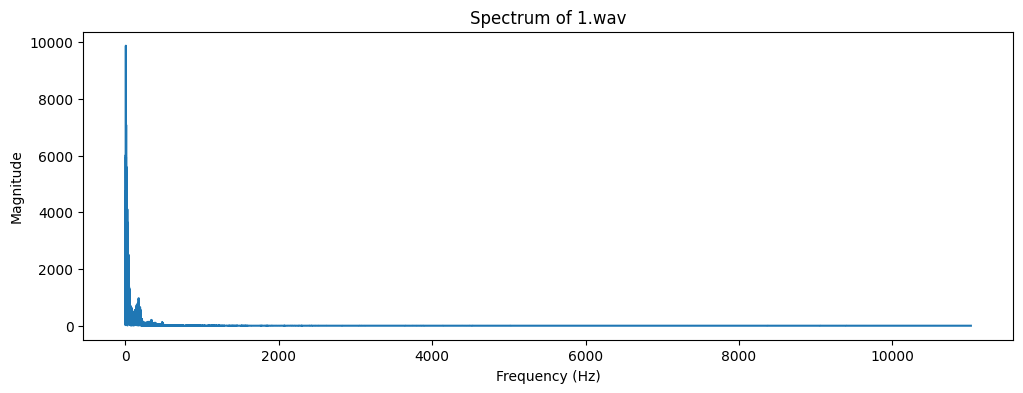

In [376]:
fft = np.fft.fft(audio_sample)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))
half_frequency = frequency[:len(magnitude)//2]
half_magnitude = magnitude[:len(magnitude)//2]
plt.figure(figsize=(12, 4))
plt.plot(half_frequency, half_magnitude)
plt.title(f"Spectrum of {file_name}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

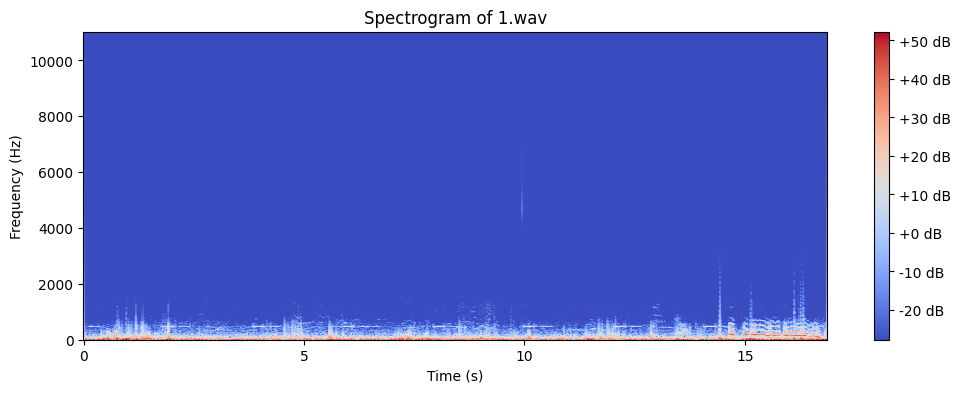

In [377]:
spectrogram = librosa.stft(audio_sample)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### MFCCs

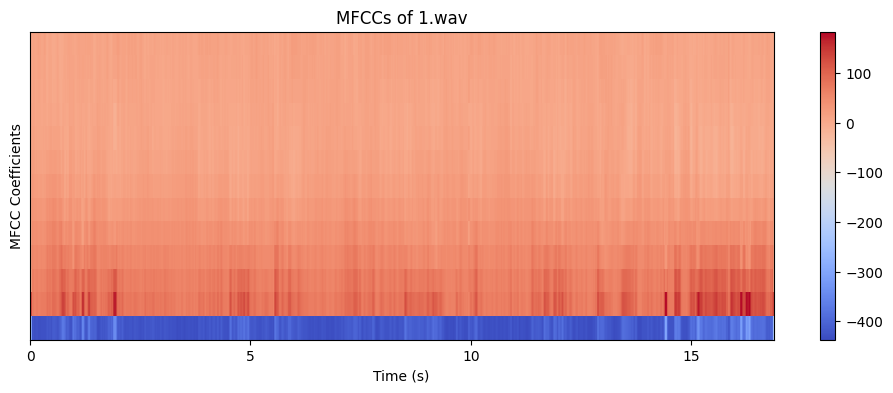

In [378]:
mfccs = librosa.feature.mfcc(y=audio_sample, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis="time")
plt.colorbar()
plt.title(f"MFCCs of {file_name}")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

# Data Preprocessing

## Feature Extraction

In [381]:
import librosa.feature as librosa_feat

### MFCC

In [382]:
def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa_feat.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    return np.array([mfcc_mean]).reshape(1, -1)

### Spectral Roll-Off

In [383]:
def extract_rolloff(file_path):
    y, sr = librosa.load(file_path, sr=None)
    rolloff = librosa_feat.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)
    return np.array([rolloff_mean]).reshape(1, -1)


### Zero-Crossing Rate

In [384]:
def extract_zcr(file_path):
    y, sr = librosa.load(file_path, sr=None)
    zcr = librosa_feat.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)
    return np.array([zcr_mean]).reshape(1, -1)

### MFCC + Spectral Roll-Off

In [385]:
def extract_mfcc_and_rolloff(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    features = []

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    features.append(mfcc_mean)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    features.append(spectral_rolloff_mean)

    return np.array(features).reshape(1, -1)

### MFCC + Zero-Crossing Rate

In [386]:
def extract_mfcc_and_zcr(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    features = []

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    features.append(mfcc_mean)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr)
    features.append(zcr_mean)

    return np.array(features).reshape(1, -1)

### Spectral Roll-Off + Zero-Crossing Rate

In [387]:
def extract_rolloff_and_zcr(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    features = []

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    features.append(spectral_rolloff_mean)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr) 
    features.append(zcr_mean)

    return np.array(features).reshape(1, -1)

### MFCC + Spectral Roll-Off + Zero-Crossing Rate

In [388]:
def extract_mfcc_rolloff_and_zcr(file_path):
    audio, sr = librosa.load(file_path, sr=22050)
    features = []

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    features.append(mfcc_mean)

    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    features.append(spectral_rolloff_mean)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr)
    features.append(zcr_mean)

    return np.array(features).reshape(1, -1)

## Load Data

In [389]:
def load_data_with_features(extract_mfcc_func, extract_rolloff_func, extract_zcr_func):
    features = []
    labels = []

    for category in categories:
        category_path = category_paths[category]
        for file in os.listdir(category_path):
            if file.endswith('.wav'):
                file_path = os.path.join(category_path, file)
                
                feature = []
                if extract_mfcc_func:
                    mfcc_feature = extract_mfcc_func(file_path)
                    feature.extend(mfcc_feature.flatten())
                if extract_rolloff_func:
                    rolloff_feature = extract_rolloff_func(file_path)
                    feature.extend(rolloff_feature.flatten())
                if extract_zcr_func:
                    zcr_feature = extract_zcr_func(file_path)
                    feature.extend(zcr_feature.flatten()) 
                
                features.append(feature)
                labels.append(category)

    return np.vstack(features), np.array(labels)

### MFCC

In [390]:
X_mfcc, y_mfcc = load_data_with_features(extract_mfcc, None, None)

### Spectral Roll-Off

In [391]:
X_rolloff, y_rolloff = load_data_with_features(None, extract_rolloff, None)

### Zero-Crossing Rate

In [392]:
X_zcr, y_zcr = load_data_with_features(None, None, extract_zcr)

### MFCC + Spectral Roll-Off

In [393]:
X_mfcc_rolloff, y_mfcc_rolloff = load_data_with_features(extract_mfcc, extract_rolloff, None)

### MFCC + Zero-Crossing Rate

In [394]:
X_mfcc_zcr, y_mfcc_zcr = load_data_with_features(extract_mfcc, None, extract_zcr)

### Spectral Roll-Off + Zero-Crossing Rate

In [395]:
X_rolloff_zcr, y_rolloff_zcr = load_data_with_features(None, extract_rolloff, extract_zcr)

### MFCC+ Spectral Roll-Off + Zero-Crossing Rate

In [396]:
X_mfcc_rolloff_zcr, y_mfcc_rolloff_zcr = load_data_with_features(extract_mfcc, extract_rolloff, extract_zcr)

## Encoding

In [397]:
encoder = LabelEncoder()

### MFCC

In [398]:
y_mfcc_encoded = encoder.fit_transform(y_mfcc)

### Spectral Roll-Off

In [399]:
y_rolloff_encoded = encoder.fit_transform(y_rolloff)

### Zero-Crossing Rate

In [400]:
y_zcr_encoded = encoder.fit_transform(y_zcr)

### MFCC + Spectral Roll-Off

In [401]:
y_mfcc_rolloff_encoded = encoder.fit_transform(y_mfcc_rolloff)

### MFCC + Zero-Crossing Rate

In [402]:
y_mfcc_zcr_encoded = encoder.fit_transform(y_mfcc_zcr)

### Spectral Roll-Off + Zero-Crossing Rate

In [403]:
y_rolloff_zcr_encoded = encoder.fit_transform(y_rolloff_zcr)

### MFCC + Spectral Roll-Off + Zero-Crossing Rate

In [404]:
y_mfcc_rolloff_zcr_encoded = encoder.fit_transform(y_mfcc_rolloff_zcr)

## Train-Test Split

### MFCC

In [405]:
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(X_mfcc, y_mfcc_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training MFCC: {X_train_mfcc.shape[0]}")
print(f"Jumlah data test MFCC: {X_test_mfcc.shape[0]}")

Jumlah data training MFCC: 177
Jumlah data test MFCC: 45


### Spectral Roll-Off

In [406]:
X_train_rolloff, X_test_rolloff, y_train_rolloff, y_test_rolloff = train_test_split(X_rolloff, y_rolloff_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training Spectral Roll-Off: {X_train_rolloff.shape[0]}")
print(f"Jumlah data test Spectral Roll-Off: {X_test_rolloff.shape[0]}")

Jumlah data training Spectral Roll-Off: 177
Jumlah data test Spectral Roll-Off: 45


### Zero-Crossing Rate

In [407]:
X_train_zcr, X_test_zcr, y_train_zcr, y_test_zcr = train_test_split(X_zcr, y_zcr_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training Zero-Crossing Rate: {X_train_zcr.shape[0]}")
print(f"Jumlah data test Zero-Crossing Rate: {X_test_zcr.shape[0]}")

Jumlah data training Zero-Crossing Rate: 177
Jumlah data test Zero-Crossing Rate: 45


### MFCC + Spectral Roll-Off

In [408]:
X_train_mfcc_rolloff, X_test_mfcc_rolloff, y_train_mfcc_rolloff, y_test_mfcc_rolloff = train_test_split(X_mfcc_rolloff, y_mfcc_rolloff_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training MFCC + Spectral Roll-Off: {X_train_mfcc_rolloff.shape[0]}")
print(f"Jumlah data test MFCC + Spectral Roll-Off: {X_test_mfcc_rolloff.shape[0]}")

Jumlah data training MFCC + Spectral Roll-Off: 177
Jumlah data test MFCC + Spectral Roll-Off: 45


### MFCC + Zero-Crossing Rate

In [409]:
X_train_mfcc_zcr, X_test_mfcc_zcr, y_train_mfcc_zcr, y_test_mfcc_zcr = train_test_split(X_mfcc_zcr, y_mfcc_zcr_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training MFCC + Zero-Crossing Rate: {X_train_mfcc_zcr.shape[0]}")
print(f"Jumlah data test MFCC + Zero-Crossing Rate: {X_test_mfcc_zcr.shape[0]}")

Jumlah data training MFCC + Zero-Crossing Rate: 177
Jumlah data test MFCC + Zero-Crossing Rate: 45


### Spectral Roll-Off + Zero-Crossing Rate

In [410]:
X_train_rolloff_zcr, X_test_rolloff_zcr, y_train_rolloff_zcr, y_test_rolloff_zcr = train_test_split(X_rolloff_zcr, y_rolloff_zcr_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training Spectral Roll-Off + Zero-Crossing Rate: {X_train_rolloff_zcr.shape[0]}")
print(f"Jumlah data test Spectral Roll-Off + Zero-Crossing Rate: {X_test_rolloff_zcr.shape[0]}")

Jumlah data training Spectral Roll-Off + Zero-Crossing Rate: 177
Jumlah data test Spectral Roll-Off + Zero-Crossing Rate: 45


### MFCC + Spectral Roll-Off + Zero-Crossing Rate

In [411]:
X_train_mfcc_rolloff_zcr, X_test_mfcc_rolloff_zcr, y_train_mfcc_rolloff_zcr, y_test_mfcc_rolloff_zcr = train_test_split(X_mfcc_rolloff_zcr, y_mfcc_rolloff_zcr_encoded, test_size=0.2, random_state=42)
print(f"Jumlah data training MFCC + Spectral Roll-Off + Zero-Crossing Rate: {X_train_mfcc_rolloff_zcr.shape[0]}")
print(f"Jumlah data test MFCC + Spectral Roll-Off + Zero-Crossing Rate: {X_test_mfcc_rolloff_zcr.shape[0]}")

Jumlah data training MFCC + Spectral Roll-Off + Zero-Crossing Rate: 177
Jumlah data test MFCC + Spectral Roll-Off + Zero-Crossing Rate: 45


# Data Modelling

In [412]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Machine Learning

### Random Forest

In [413]:
from sklearn.ensemble import RandomForestClassifier

#### MFCC

##### Classification Report

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_mfcc, y_train_mfcc)
y_pred_mfcc = rf_model.predict(X_test_mfcc)
print("Classification Report untuk Spectral MFCC:")
print(classification_report(y_test_mfcc, y_pred_mfcc))

Classification Report untuk Spectral MFCC:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.40      0.50      0.44         4

    accuracy                           0.89        45
   macro avg       0.68      0.71      0.69        45
weighted avg       0.90      0.89      0.89        45



##### Confusion Matrix

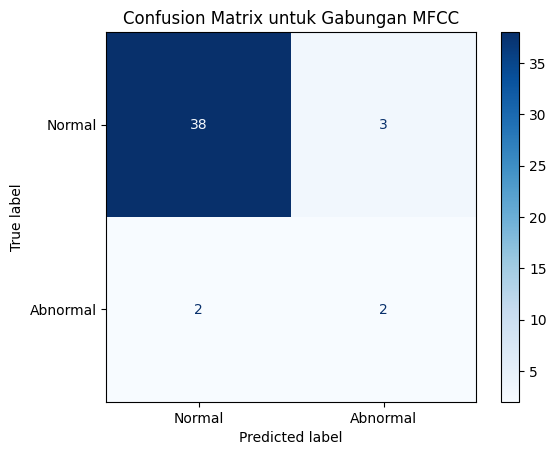

In [415]:
cm = confusion_matrix(y_test_mfcc, y_pred_mfcc)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Gabungan MFCC")
plt.show()

#### Spectral Roll-Off

##### Classification Report

In [416]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_rolloff, y_train_rolloff)
y_pred_rolloff = rf_model.predict(X_test_rolloff)
print("Classification Report untuk Spectral Roll-Off:")
print(classification_report(y_test_rolloff, y_pred_rolloff))

Classification Report untuk Spectral Roll-Off:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.20      0.25      0.22         4

    accuracy                           0.84        45
   macro avg       0.56      0.58      0.57        45
weighted avg       0.86      0.84      0.85        45



##### Confusion Matrix

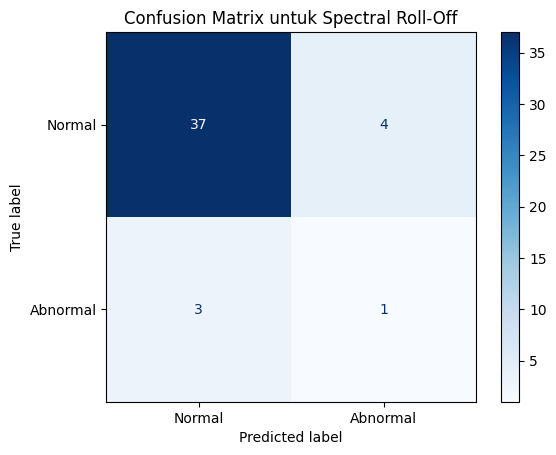

In [417]:
cm = confusion_matrix(y_test_rolloff, y_pred_rolloff)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off")
plt.show()

#### Zero-Crossing Rate

##### Classification Report

In [418]:
rf_model_zcr = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_zcr.fit(X_train_zcr, y_train_zcr)

y_pred_zcr = rf_model_zcr.predict(X_test_zcr)
print("Classification Report untuk Zero-Crossing Rate:")
print(classification_report(y_test_zcr, y_pred_zcr))

Classification Report untuk Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.20      0.25      0.22         4

    accuracy                           0.84        45
   macro avg       0.56      0.58      0.57        45
weighted avg       0.86      0.84      0.85        45



##### Confusion Matrix

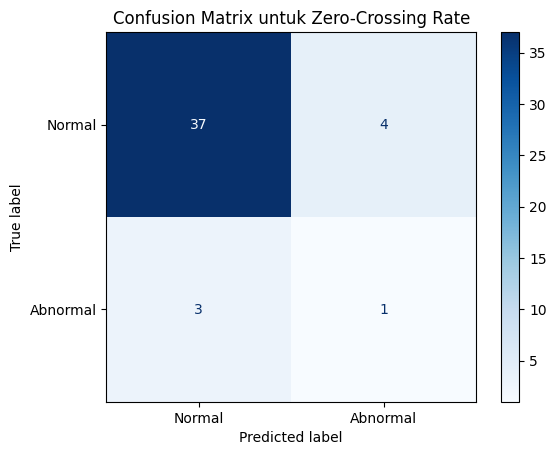

In [419]:
cm_zcr = confusion_matrix(y_test_zcr, y_pred_zcr)
cm_display_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off

##### Classification Report

In [420]:
rf_model_mfcc_rolloff = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_mfcc_rolloff.fit(X_train_mfcc_rolloff, y_train_mfcc_rolloff)

y_pred_mfcc_rolloff = rf_model_mfcc_rolloff.predict(X_test_mfcc_rolloff)
print("Classification Report untuk MFCC + Spectral Roll-Off:")
print(classification_report(y_test_mfcc_rolloff, y_pred_mfcc_rolloff))

Classification Report untuk MFCC + Spectral Roll-Off:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45



##### Confusion Matrix

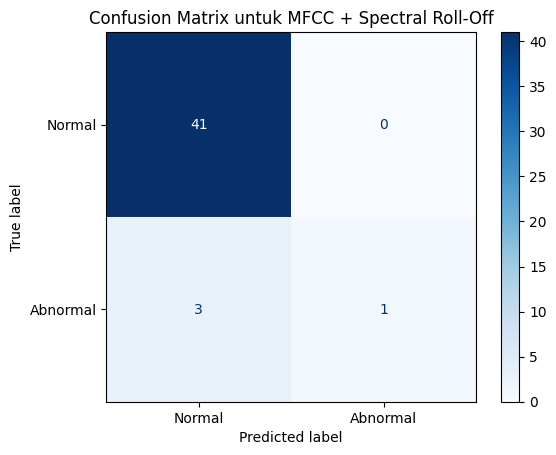

In [421]:
cm_mfcc_rolloff = confusion_matrix(y_test_mfcc_rolloff, y_pred_mfcc_rolloff)
cm_display_mfcc_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off")
plt.show()

#### MFCC + Zero-Crossing Rate

##### Classification Report

In [422]:
rf_model_mfcc_zcr = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_mfcc_zcr.fit(X_train_mfcc_zcr, y_train_mfcc_zcr)

y_pred_mfcc_zcr = rf_model_mfcc_zcr.predict(X_test_mfcc_zcr)
print("Classification Report untuk MFCC + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_zcr, y_pred_mfcc_zcr))

Classification Report untuk MFCC + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45



##### Confusion Matrix

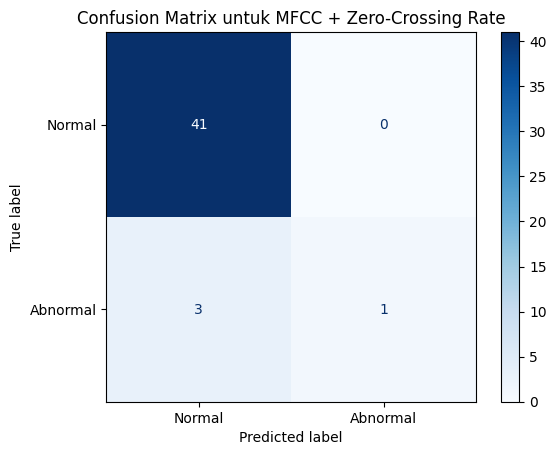

In [423]:
cm_mfcc_zcr = confusion_matrix(y_test_mfcc_zcr, y_pred_mfcc_zcr)
cm_display_mfcc_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Zero-Crossing Rate")
plt.show()

#### Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [424]:
rf_model_rolloff_zcr = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_rolloff_zcr.fit(X_train_rolloff_zcr, y_train_rolloff_zcr)

y_pred_rolloff_zcr = rf_model_rolloff_zcr.predict(X_test_rolloff_zcr)
print("Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_rolloff_zcr, y_pred_rolloff_zcr))

Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45



##### Confusion Matrix

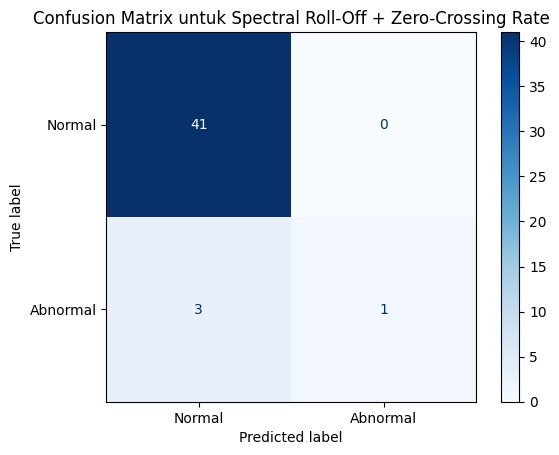

In [ ]:
cm_rolloff_zcr = confusion_matrix(y_test_rolloff_zcr, y_pred_rolloff_zcr)
cm_display_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [426]:
rf_model_mfcc_rolloff_zcr = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_mfcc_rolloff_zcr.fit(X_train_mfcc_rolloff_zcr, y_train_mfcc_rolloff_zcr)

y_pred_mfcc_rolloff_zcr = rf_model_mfcc_rolloff_zcr.predict(X_test_mfcc_rolloff_zcr)
print("Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr))

Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.25      0.40         4

    accuracy                           0.93        45
   macro avg       0.97      0.62      0.68        45
weighted avg       0.94      0.93      0.91        45



##### Confusion Matrix

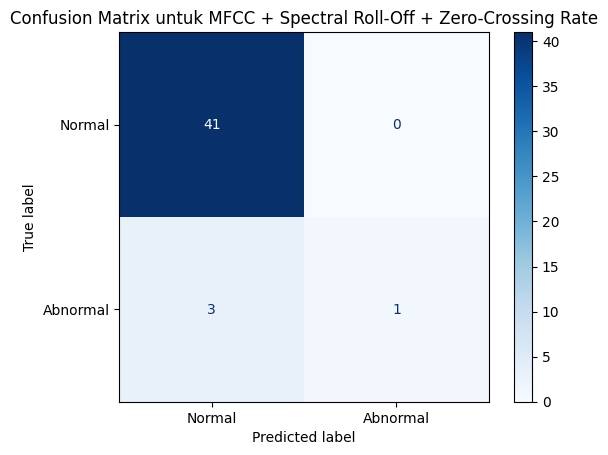

In [427]:
cm_mfcc_rolloff_zcr = confusion_matrix(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr)
cm_display_mfcc_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

### Light Gradient Boost Machine (LGBM)

In [428]:
from lightgbm import LGBMClassifier


#### MFCC

##### Classification Report

In [429]:
lgbm_model_mfcc = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_mfcc.fit(X_train_mfcc, y_train_mfcc)

y_pred_mfcc = lgbm_model_mfcc.predict(X_test_mfcc)
print("Classification Report untuk MFCC:")
print(classification_report(y_test_mfcc, y_pred_mfcc))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 748
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

##### Confusion Matrix

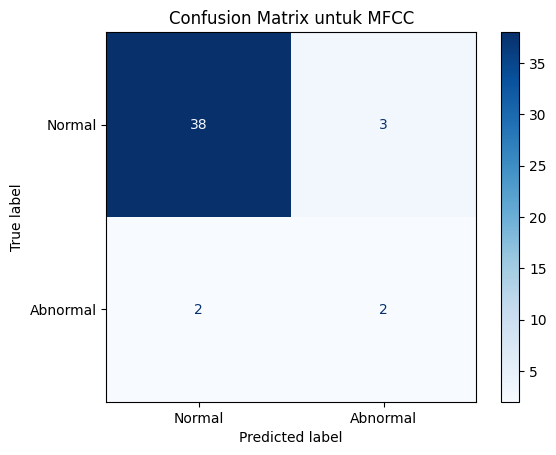

In [430]:
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
cm_display_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC")
plt.show()

#### Spectral Roll-Off

##### Classification Report

In [431]:
lgbm_model_rolloff = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_rolloff.fit(X_train_rolloff, y_train_rolloff)

y_pred_rolloff = lgbm_model_rolloff.predict(X_test_rolloff)
print("Classification Report untuk Spectral Roll-Off:")
print(classification_report(y_test_rolloff, y_pred_rolloff))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

##### Confusion Matrix

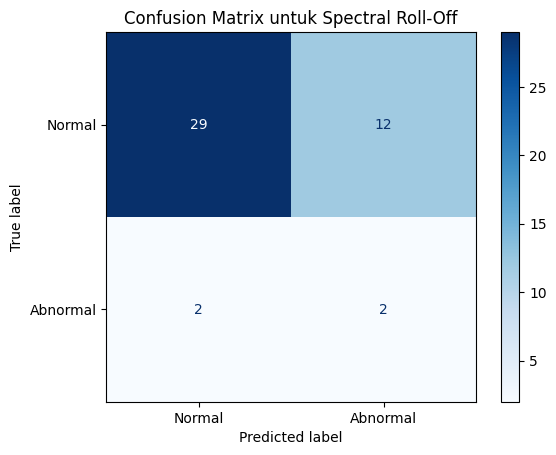

In [432]:
cm_rolloff = confusion_matrix(y_test_rolloff, y_pred_rolloff)
cm_display_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off")
plt.show()

#### Zero-Crossing Rate

##### Classification Report

In [433]:
lgbm_model_zcr = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_zcr.fit(X_train_zcr, y_train_zcr)

y_pred_zcr = lgbm_model_zcr.predict(X_test_zcr)
print("Classification Report untuk Zero-Crossing Rate:")
print(classification_report(y_test_zcr, y_pred_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

##### Confusion Matrix

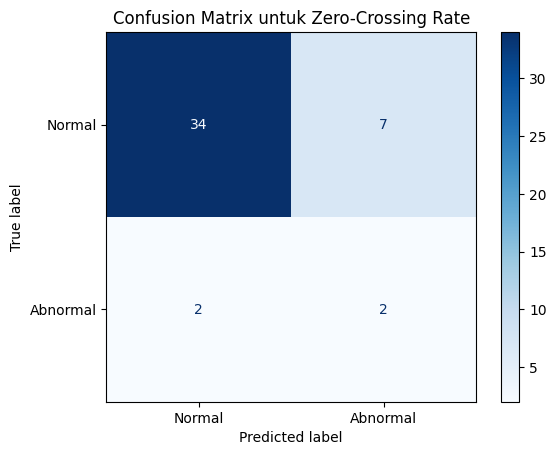

In [434]:
cm_zcr = confusion_matrix(y_test_zcr, y_pred_zcr)
cm_display_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off

##### Classification Report

In [435]:
lgbm_model_mfcc_rolloff = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_mfcc_rolloff.fit(X_train_mfcc_rolloff, y_train_mfcc_rolloff)

y_pred_mfcc_rolloff = lgbm_model_mfcc_rolloff.predict(X_test_mfcc_rolloff)
print("Classification Report untuk MFCC + Spectral Roll-Off:")
print(classification_report(y_test_mfcc_rolloff, y_pred_mfcc_rolloff))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

##### Confusion Matrix

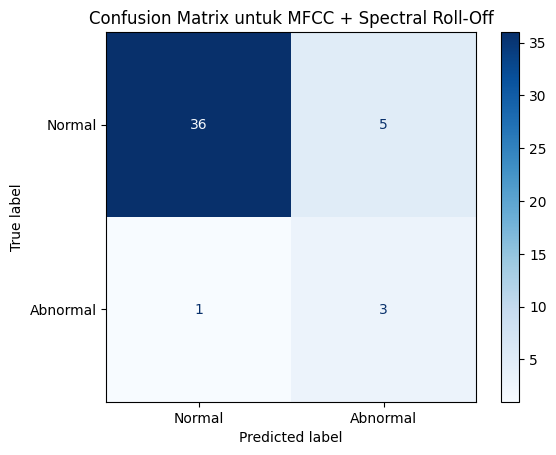

In [436]:
cm_mfcc_rolloff = confusion_matrix(y_test_mfcc_rolloff, y_pred_mfcc_rolloff)
cm_display_mfcc_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off")
plt.show()

#### MFCC + Zero-Crossing Rate

##### Classification Report

In [437]:
lgbm_model_mfcc_zcr = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_mfcc_zcr.fit(X_train_mfcc_zcr, y_train_mfcc_zcr)

y_pred_mfcc_zcr = lgbm_model_mfcc_zcr.predict(X_test_mfcc_zcr)
print("Classification Report untuk MFCC + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_zcr, y_pred_mfcc_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

##### Confusion Matrix

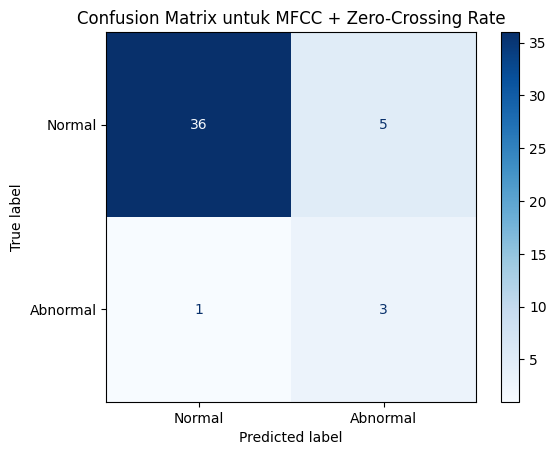

In [438]:
cm_mfcc_zcr = confusion_matrix(y_test_mfcc_zcr, y_pred_mfcc_zcr)
cm_display_mfcc_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Zero-Crossing Rate")
plt.show()

#### Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [439]:
lgbm_model_rolloff_zcr = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_rolloff_zcr.fit(X_train_rolloff_zcr, y_train_rolloff_zcr)

y_pred_rolloff_zcr = lgbm_model_rolloff_zcr.predict(X_test_rolloff_zcr)
print("Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_rolloff_zcr, y_pred_rolloff_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

##### Confusion Matrix

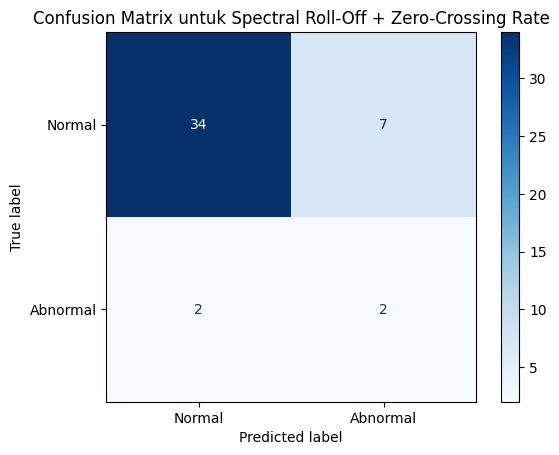

In [440]:
cm_rolloff_zcr = confusion_matrix(y_test_rolloff_zcr, y_pred_rolloff_zcr)
cm_display_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [441]:
lgbm_model_mfcc_rolloff_zcr = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model_mfcc_rolloff_zcr.fit(X_train_mfcc_rolloff_zcr, y_train_mfcc_rolloff_zcr)

y_pred_mfcc_rolloff_zcr = lgbm_model_mfcc_rolloff_zcr.predict(X_test_mfcc_rolloff_zcr)
print("Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

##### Confusion Matrix

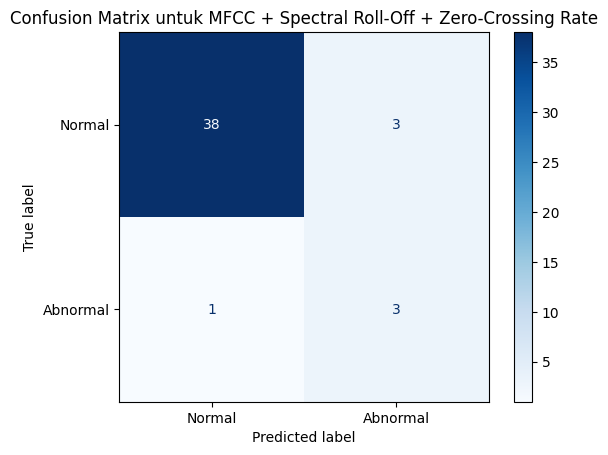

In [442]:
cm_mfcc_rolloff_zcr = confusion_matrix(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr)
cm_display_mfcc_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

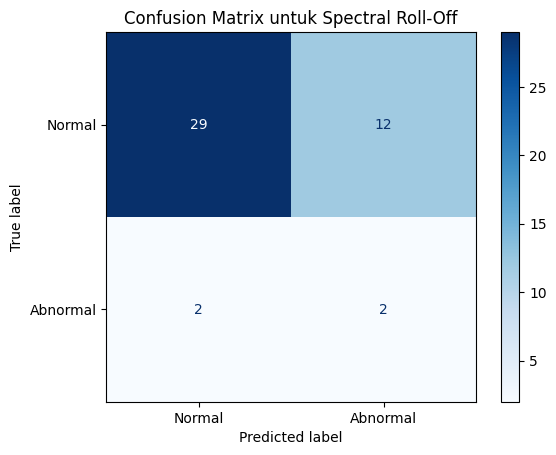

In [443]:
cm_rolloff = confusion_matrix(y_test_rolloff, y_pred_rolloff)
cm_display_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off")
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

#### MFCC

##### Classification Report

In [452]:
svm_model_mfcc = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_mfcc.fit(X_train_mfcc, y_train_mfcc)

y_pred_mfcc = svm_model_mfcc.predict(X_test_mfcc)
print("Classification Report untuk MFCC:")
print(classification_report(y_test_mfcc, y_pred_mfcc))

Classification Report untuk MFCC:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        41
           1       0.13      1.00      0.24         4

    accuracy                           0.42        45
   macro avg       0.57      0.68      0.39        45
weighted avg       0.92      0.42      0.51        45



##### Confusion Matrix

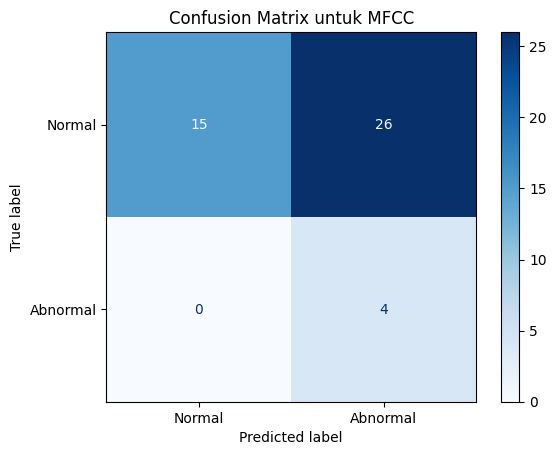

In [453]:
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
cm_display_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC")
plt.show()

#### Spectral Roll-Off

##### Classification Report

In [454]:
svm_model_rolloff = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_rolloff.fit(X_train_rolloff, y_train_rolloff)

y_pred_rolloff = svm_model_rolloff.predict(X_test_rolloff)
print("Classification Report untuk Spectral Roll-Off:")
print(classification_report(y_test_rolloff, y_pred_rolloff))

Classification Report untuk Spectral Roll-Off:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.33      0.25      0.29         4

    accuracy                           0.89        45
   macro avg       0.63      0.60      0.61        45
weighted avg       0.88      0.89      0.88        45



##### Confusion Matrix

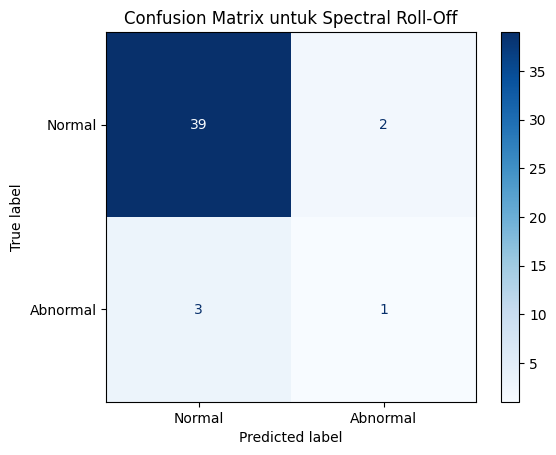

In [455]:
cm_rolloff = confusion_matrix(y_test_rolloff, y_pred_rolloff)
cm_display_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off")
plt.show()

#### Zero-Crossing Rate

##### Classification Report

In [456]:
svm_model_zcr = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_zcr.fit(X_train_zcr, y_train_zcr)

y_pred_zcr = svm_model_zcr.predict(X_test_zcr)
print("Classification Report untuk Zero-Crossing Rate:")
print(classification_report(y_test_zcr, y_pred_zcr))

Classification Report untuk Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        41
           1       0.17      0.75      0.27         4

    accuracy                           0.64        45
   macro avg       0.56      0.69      0.52        45
weighted avg       0.89      0.64      0.72        45



##### Confusion Matrix

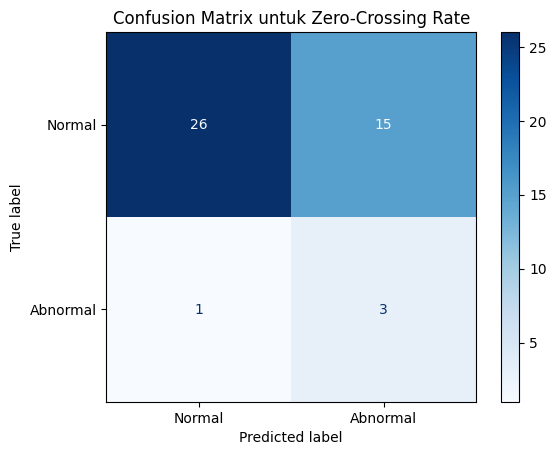

In [457]:
cm_zcr = confusion_matrix(y_test_zcr, y_pred_zcr)
cm_display_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off

##### Classification Report

In [463]:
svm_model_mfcc_rolloff = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_mfcc_rolloff.fit(X_train_mfcc_rolloff, y_train_mfcc_rolloff)

y_pred_mfcc_rolloff = svm_model_mfcc_rolloff.predict(X_test_mfcc_rolloff)
print("Classification Report untuk MFCC + Spectral Roll-Off:")
print(classification_report(y_test_mfcc_rolloff, y_pred_mfcc_rolloff))

Classification Report untuk MFCC + Spectral Roll-Off:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.33      0.25      0.29         4

    accuracy                           0.89        45
   macro avg       0.63      0.60      0.61        45
weighted avg       0.88      0.89      0.88        45



##### Confusion Matrix

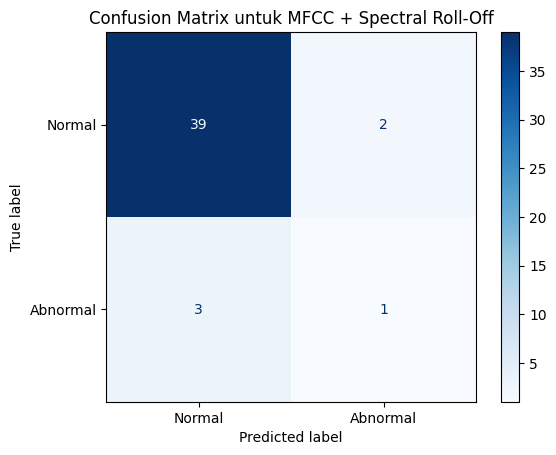

In [464]:
cm_mfcc_rolloff = confusion_matrix(y_test_mfcc_rolloff, y_pred_mfcc_rolloff)
cm_display_mfcc_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off")
plt.show()

#### MFCC + Zero-Crossing Rate

##### Classification Report

In [465]:
svm_model_mfcc_zcr = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_mfcc_zcr.fit(X_train_mfcc_zcr, y_train_mfcc_zcr)

y_pred_mfcc_zcr = svm_model_mfcc_zcr.predict(X_test_mfcc_zcr)
print("Classification Report untuk MFCC + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_zcr, y_pred_mfcc_zcr))

Classification Report untuk MFCC + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        41
           1       0.13      1.00      0.24         4

    accuracy                           0.42        45
   macro avg       0.57      0.68      0.39        45
weighted avg       0.92      0.42      0.51        45



##### Confusion Matrix

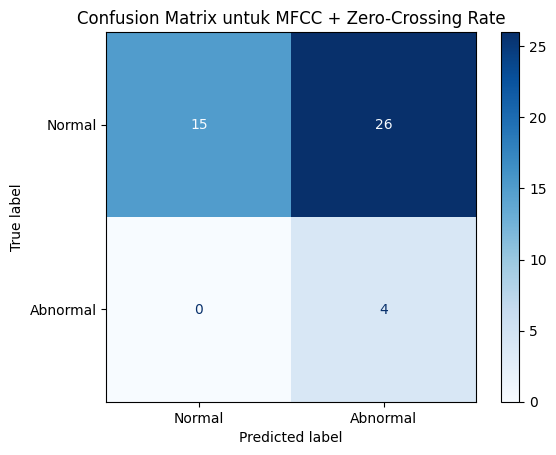

In [466]:
cm_mfcc_zcr = confusion_matrix(y_test_mfcc_zcr, y_pred_mfcc_zcr)
cm_display_mfcc_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Zero-Crossing Rate")
plt.show()

#### Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [467]:
svm_model_rolloff_zcr = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_rolloff_zcr.fit(X_train_rolloff_zcr, y_train_rolloff_zcr)

y_pred_rolloff_zcr = svm_model_rolloff_zcr.predict(X_test_rolloff_zcr)
print("Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_rolloff_zcr, y_pred_rolloff_zcr))

Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.25      0.25      0.25         4

    accuracy                           0.87        45
   macro avg       0.59      0.59      0.59        45
weighted avg       0.87      0.87      0.87        45



##### Confusion Matrix

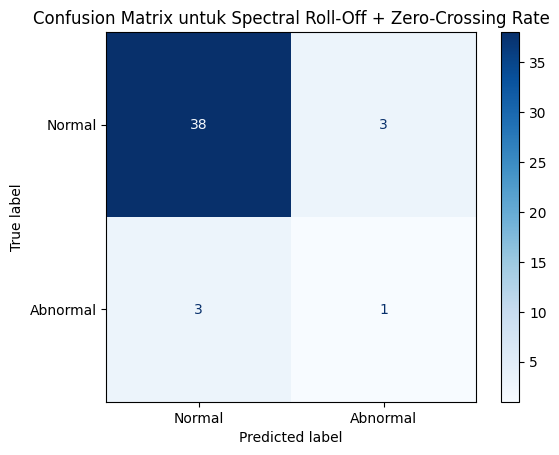

In [468]:
cm_rolloff_zcr = confusion_matrix(y_test_rolloff_zcr, y_pred_rolloff_zcr)
cm_display_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

#### MFCC + Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [469]:
svm_model_mfcc_rolloff_zcr = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_mfcc_rolloff_zcr.fit(X_train_mfcc_rolloff_zcr, y_train_mfcc_rolloff_zcr)

y_pred_mfcc_rolloff_zcr = svm_model_mfcc_rolloff_zcr.predict(X_test_mfcc_rolloff_zcr)
print("Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate:")
print(classification_report(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr))

Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.33      0.25      0.29         4

    accuracy                           0.89        45
   macro avg       0.63      0.60      0.61        45
weighted avg       0.88      0.89      0.88        45



##### Confusion Matrix

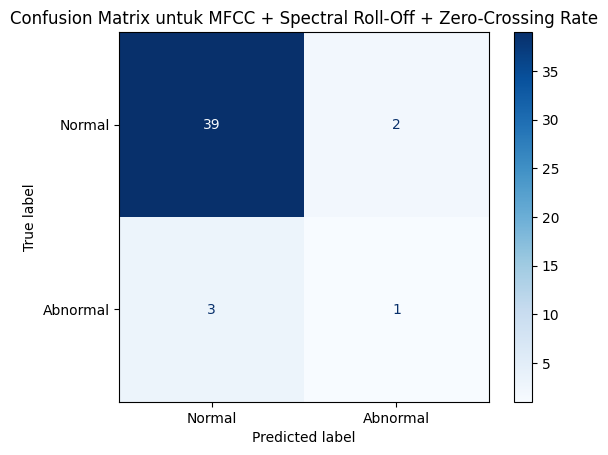

In [470]:
cm_mfcc_rolloff_zcr = confusion_matrix(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr)
cm_display_mfcc_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate")
plt.show()

### Voting Classifier dengan Model Random Forest, SVM, dan LGBM

In [472]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

#### MFCC

##### Classification Report

In [475]:
voting_model_mfcc = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_mfcc.fit(X_train_mfcc, y_train_mfcc)

y_pred_mfcc = voting_model_mfcc.predict(X_test_mfcc)
print("Classification Report untuk MFCC dengan Voting Classifier:")
print(classification_report(y_test_mfcc, y_pred_mfcc))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 748
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


##### Confusion Matrix

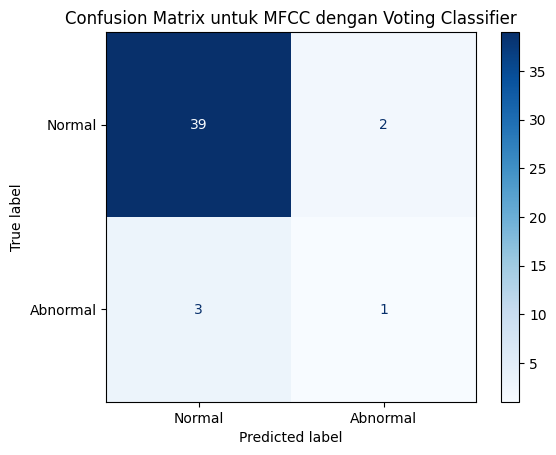

In [474]:
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
cm_display_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC dengan Voting Classifier")
plt.show()

#### Spectral Roll-Off

##### Classification Report

In [476]:
voting_model_rolloff = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_rolloff.fit(X_train_rolloff, y_train_rolloff)

y_pred_rolloff = voting_model_rolloff.predict(X_test_rolloff)
print("Classification Report untuk Spectral Roll-Off dengan Voting Classifier:")
print(classification_report(y_test_rolloff, y_pred_rolloff))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

##### Confusion Matrix

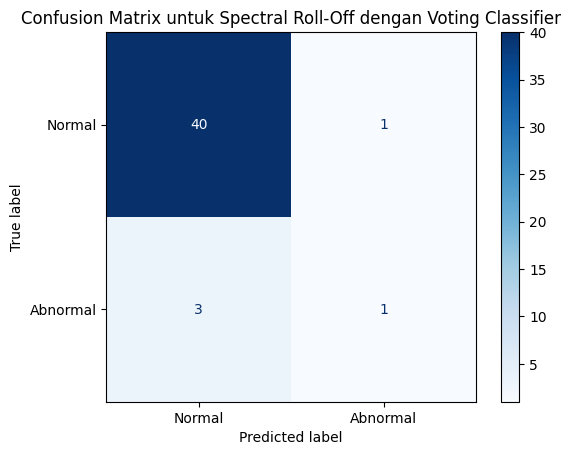

In [477]:
cm_rolloff = confusion_matrix(y_test_rolloff, y_pred_rolloff)
cm_display_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off dengan Voting Classifier")
plt.show()

#### Zero-Crossing Rate

##### Classification Report

In [478]:
voting_model_zcr = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_zcr.fit(X_train_zcr, y_train_zcr)

y_pred_zcr = voting_model_zcr.predict(X_test_zcr)
print("Classification Report untuk Zero-Crossing Rate dengan Voting Classifier:")
print(classification_report(y_test_zcr, y_pred_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

##### Confusion Matrix

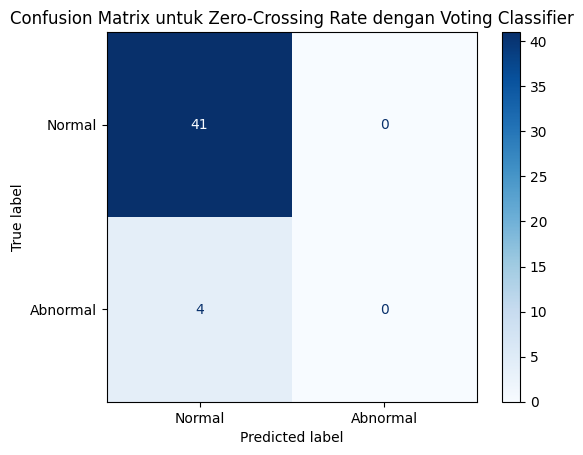

In [479]:
cm_zcr = confusion_matrix(y_test_zcr, y_pred_zcr)
cm_display_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Zero-Crossing Rate dengan Voting Classifier")
plt.show()

#### MFCC + Spectral Roll-Off

##### Classification Report

In [480]:
voting_model_mfcc_rolloff = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_mfcc_rolloff.fit(X_train_mfcc_rolloff, y_train_mfcc_rolloff)

y_pred_mfcc_rolloff = voting_model_mfcc_rolloff.predict(X_test_mfcc_rolloff)
print("Classification Report untuk MFCC + Spectral Roll-Off dengan Voting Classifier:")
print(classification_report(y_test_mfcc_rolloff, y_pred_mfcc_rolloff))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

##### Confusion Matrix

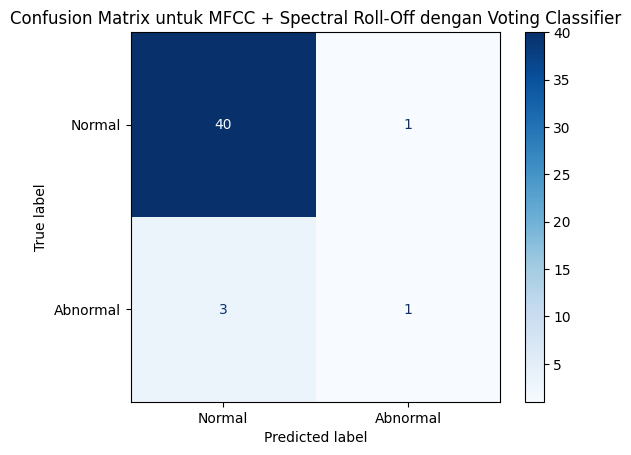

In [481]:
cm_mfcc_rolloff = confusion_matrix(y_test_mfcc_rolloff, y_pred_mfcc_rolloff)
cm_display_mfcc_rolloff = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off dengan Voting Classifier")
plt.show()

#### MFCC + Zero-Crossing Rate

##### Classification Report

In [482]:
voting_model_mfcc_zcr = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_mfcc_zcr.fit(X_train_mfcc_zcr, y_train_mfcc_zcr)

y_pred_mfcc_zcr = voting_model_mfcc_zcr.predict(X_test_mfcc_zcr)
print("Classification Report untuk MFCC + Zero-Crossing Rate dengan Voting Classifier:")
print(classification_report(y_test_mfcc_zcr, y_pred_mfcc_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

##### Confusion Matrix

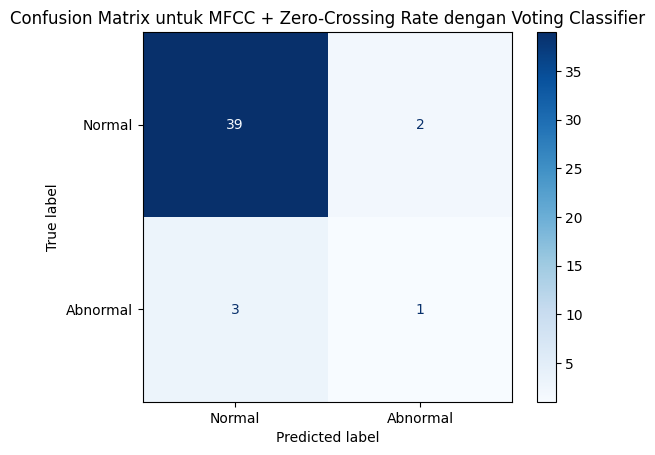

In [483]:
cm_mfcc_zcr = confusion_matrix(y_test_mfcc_zcr, y_pred_mfcc_zcr)
cm_display_mfcc_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Zero-Crossing Rate dengan Voting Classifier")
plt.show()

#### Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [484]:
voting_model_rolloff_zcr = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_rolloff_zcr.fit(X_train_rolloff_zcr, y_train_rolloff_zcr)

y_pred_rolloff_zcr = voting_model_rolloff_zcr.predict(X_test_rolloff_zcr)
print("Classification Report untuk Spectral Roll-Off + Zero-Crossing Rate dengan Voting Classifier:")
print(classification_report(y_test_rolloff_zcr, y_pred_rolloff_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

##### Confusion Matrix

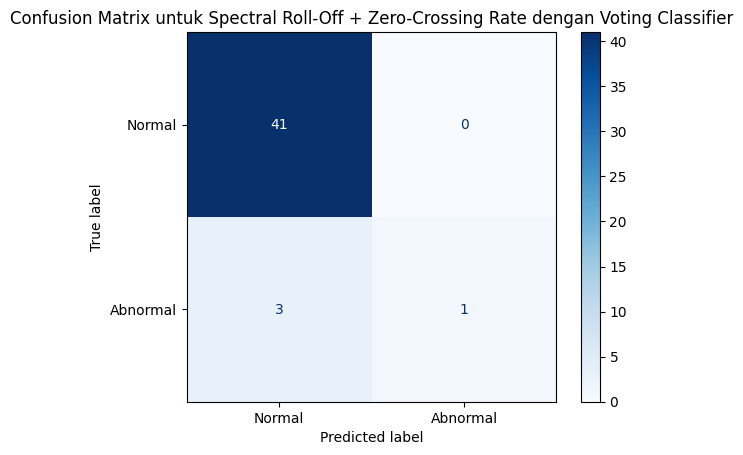

In [485]:
cm_rolloff_zcr = confusion_matrix(y_test_rolloff_zcr, y_pred_rolloff_zcr)
cm_display_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk Spectral Roll-Off + Zero-Crossing Rate dengan Voting Classifier")
plt.show()

#### MFCC + Spectral Roll-Off + Zero-Crossing Rate

##### Classification Report

In [486]:
voting_model_mfcc_rolloff_zcr = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lgbm', lgbm_model)], voting='hard')
voting_model_mfcc_rolloff_zcr.fit(X_train_mfcc_rolloff_zcr, y_train_mfcc_rolloff_zcr)

y_pred_mfcc_rolloff_zcr = voting_model_mfcc_rolloff_zcr.predict(X_test_mfcc_rolloff_zcr)
print("Classification Report untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate dengan Voting Classifier:")
print(classification_report(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr))

[LightGBM] [Info] Number of positive: 21, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118644 -> initscore=-2.005334
[LightGBM] [Info] Start training from score -2.005334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

##### Confusion Matrix

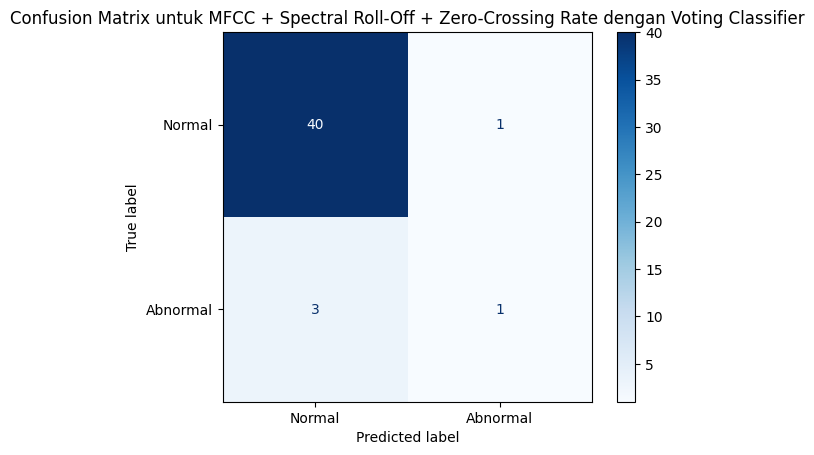

In [487]:
cm_mfcc_rolloff_zcr = confusion_matrix(y_test_mfcc_rolloff_zcr, y_pred_mfcc_rolloff_zcr)
cm_display_mfcc_rolloff_zcr = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc_rolloff_zcr, display_labels=['Normal', 'Abnormal'])
cm_display_mfcc_rolloff_zcr.plot(cmap='Blues')
plt.title("Confusion Matrix untuk MFCC + Spectral Roll-Off + Zero-Crossing Rate dengan Voting Classifier")
plt.show()

# Implementasi Hasil Analisis Suara Paru-Paru untuk Sistem Deteksi Penyakit Paru-Paru

## Load Model (Random Forest dengan Fitur MFCC + Spectral Roll-Off + Zero-Crossing Rate)

In [533]:
import joblib

joblib.dump(rf_model_mfcc_rolloff_zcr, 'rf_model_mfcc_rolloff_zcr.pkl')

['rf_model_mfcc_rolloff_zcr.pkl']

## Prediksi Pernapasan Abnormal

In [ ]:
import os
import numpy as np
import librosa
import joblib

def extract_features(audio_file):
    audio, sr = librosa.load(audio_file, sr=None)

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rolloff = np.mean(rolloff)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr = np.mean(zcr)

    features = np.hstack((mfcc, rolloff, zcr))
    return features

rf_model = joblib.load('rf_model_mfcc_rolloff_zcr.pkl')

audio_folder = 'data/Abnormal'

correct_predictions = 0
incorrect_predictions = 0
abnormal_count = 0
normal_count = 0

for filename in os.listdir(audio_folder):
    if filename.endswith('.wav'):
        audio_file = os.path.join(audio_folder, filename)
        
        features = extract_features(audio_file)
        features = features.reshape(1, -1)

        prediction = rf_model.predict(features)

        if prediction == 0:
            correct_predictions += 1
            abnormal_count += 1
        else:
            incorrect_predictions += 1
            normal_count += 1

        print(f"{filename} = {'Abnormal' if prediction == 0 else 'Normal'}")

1.wav = Abnormal
10 (2).wav = Abnormal
10.wav = Abnormal
11.wav = Abnormal
12 (2).wav = Abnormal
12.wav = Abnormal
13 (2).wav = Abnormal
13.wav = Abnormal
14.wav = Abnormal
15.wav = Abnormal
16.wav = Abnormal
17.wav = Abnormal
18.wav = Abnormal
19.wav = Abnormal
2.wav = Abnormal
20.wav = Abnormal
3.wav = Abnormal
4.wav = Abnormal
5 (2).wav = Abnormal
5.wav = Abnormal
6 (3).wav = Abnormal
6.wav = Abnormal
7.wav = Abnormal
8 (2).wav = Abnormal
8.wav = Abnormal
9 (2).wav = Abnormal
9.wav = Abnormal
asthma patient wheeze.wav = Abnormal
asthma wheezing.wav = Abnormal
asthma wheezing3.wav = Abnormal
Coarse crackles of bronchiectasis12.wav = Abnormal
Coarse crackles of bronchiectasis13.wav = Abnormal
copd (2).wav = Abnormal
copd (3).wav = Abnormal
copd (4).wav = Abnormal
copd- crepatation3.wav = Abnormal
COPD.wav = Abnormal
crackles and wheezes- bronchiectasis in a patient.wav = Abnormal
crackles and wheezing.wav = Abnormal
crackles and wheezing2.wav = Abnormal
crackles and wheezing3.wav = Ab

In [ ]:
print("\nSummary of predictions:")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Total Abnormal predicted: {abnormal_count}")
print(f"Total Normal predicted: {normal_count}")


Summary of predictions:
Correct predictions: 197
Incorrect predictions: 0
Total Abnormal predicted: 197
Total Normal predicted: 0


## Prediksi Pernapasan Normal

In [ ]:
import os
import numpy as np
import librosa
import joblib

def extract_features(audio_file):
    audio, sr = librosa.load(audio_file, sr=None)

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rolloff = np.mean(rolloff)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr = np.mean(zcr)

    features = np.hstack((mfcc, rolloff, zcr))
    return features

rf_model = joblib.load('rf_model_mfcc_rolloff_zcr.pkl')

audio_folder = 'data/Normal'

correct_predictions = 0
incorrect_predictions = 0
abnormal_count = 0
normal_count = 0

for filename in os.listdir(audio_folder):
    if filename.endswith('.wav'):
        audio_file = os.path.join(audio_folder, filename)
        
        features = extract_features(audio_file)
        features = features.reshape(1, -1)

        prediction = rf_model.predict(features)

        if prediction == 0:
            correct_predictions += 1
            abnormal_count += 1
        else:
            incorrect_predictions += 1
            normal_count += 1

        print(f"{filename} = {'Abnormal' if prediction == 0 else 'Normal'}")

breath n 3.wav = Normal
breathn3.wav = Normal
n breath 2.wav = Normal
n breath sound 5.wav = Normal
n breath.wav = Normal
normal breath - 56 years old patient right side chest sound.wav = Normal
normal breath sound (1).wav = Normal
normal breath sound (10).wav = Normal
normal breath sound (2).wav = Normal
normal breath sound (3).wav = Abnormal
normal breath sound (4).wav = Normal
normal breath sound (5).wav = Normal
normal breath sound (6).wav = Normal
normal breath sound (7).wav = Normal
normal breath sound (8).wav = Normal
normal breath sound (9).wav = Abnormal
normal breath sound rigth side.wav = Normal
normal breath sound.wav = Normal
normal breath sound2.wav = Abnormal
normal breath sound3.wav = Normal
normal heart bit.wav = Normal
normal heart bit2.wav = Normal
normal heart sound1.wav = Normal
normal lung sound.wav = Normal
nrm breat sound 4.wav = Normal


In [ ]:
print("\nSummary of predictions:")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Total Abnormal predicted: {abnormal_count}")
print(f"Total Normal predicted: {normal_count}")


Summary of predictions:
Correct predictions: 3
Incorrect predictions: 22
Total Abnormal predicted: 3
Total Normal predicted: 22


## Sistem Deteksi Penyakit Paru-Paru

In [ ]:
import numpy as np
import librosa
import joblib

def extract_features(audio_file):
    audio, sr = librosa.load(audio_file, sr=None)

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)

    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rolloff = np.mean(rolloff)

    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr = np.mean(zcr)

    features = np.hstack((mfcc, rolloff, zcr))
    return features

rf_model = joblib.load('rf_model_mfcc_rolloff_zcr.pkl')

# Masukkan sesuai path data yang ingin anda lakukan prediksi
audio_file = 'data/Normal/normal breath sound (1).wav'

features = extract_features(audio_file)
features = features.reshape(1, -1) 

prediction = rf_model.predict(features)

if prediction == 0:
    print("Prediksi: Abnormal")
else:
    print("Prediksi: Normal")

Prediksi: Normal
